In [1]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np


2024-11-18 18:29:33.084050: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 18:29:33.150933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 18:29:33.170029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 18:29:33.304335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 18:29:34.423069: W tensorflow/compiler/tf2

In [2]:
def create_yolo_model(input_shape=(416, 416, 3), num_boxes=1):
    inputs = Input(shape=input_shape)
    # Block 1
    x = Conv2D(16, (3, 3), strides=1, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Block 2
    x = Conv2D(32, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Block 3
    x = Conv2D(64, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Block 4
    x = Conv2D(128, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Block 5
    x = Conv2D(256, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Flatten()(x)
    # Output layer
    outputs = Dense(4 * num_boxes, activation='linear')(x)  # Predict (xmin, ymin, xmax, ymax)
    model = Model(inputs, outputs)
    return model

# Create YOLO model
input_shape = (416, 416, 3)
num_boxes = 1
yolo_model = create_yolo_model(input_shape=input_shape, num_boxes=num_boxes)

# Compile the model
yolo_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
yolo_model.summary()


I0000 00:00:1731983376.163330    1272 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731983376.296628    1272 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731983376.296824    1272 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731983376.299022    1272 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731983376.299299    1272 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 416, 416, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 416, 416, 16)   │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 416, 416, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 416, 416, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 208, 208, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 208, 208, 32)   │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 208, 208, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 208, 208, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 104, 104, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 104, 104, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 104, 104, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 104, 104, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 256)    │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       692,228 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,086,324 (4.14 MB)

 Trainable params: 1,085,332 (4.14 MB)

 Non-trainable params: 992 (3.88 KB)

In [3]:
def parse_annotations(image_path, annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    bboxes = []
    width = int(root.find("size/width").text)
    height = int(root.find("size/height").text)
    for obj in root.findall("object"):
        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text) / width
        ymin = int(bndbox.find("ymin").text) / height
        xmax = int(bndbox.find("xmax").text) / width
        ymax = int(bndbox.find("ymax").text) / height
        bboxes.append([xmin, ymin, xmax, ymax])
    return bboxes

def preprocess_for_yolo(image, bboxes, num_boxes=1):
    image = tf.image.resize(image, (416, 416)) / 255.0 
    # Flatten bounding boxes and pad to match `4 * num_boxes`
    bboxes = bboxes[:num_boxes]
    bboxes += [[0, 0, 0, 0]] * (num_boxes - len(bboxes))
    bboxes = tf.reshape(bboxes, (4 * num_boxes,)) 
    return image, bboxes




In [4]:
def load_sample(image_path, annotation_path):
    # Decode EagerTensors to strings
    image_path = image_path.numpy().decode('utf-8')
    annotation_path = annotation_path.numpy().decode('utf-8')
    # Load and process image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    # Parse annotations
    bboxes = parse_annotations(image_path, annotation_path)
    # Preprocess for YOLO
    image, bboxes = preprocess_for_yolo(image, bboxes)
    return image, bboxes

def load_yolo_dataset(image_dir, annotation_dir, num_boxes=1):
    # Get paths to images and annotations
    image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
    annotation_paths = sorted([os.path.join(annotation_dir, f) for f in os.listdir(annotation_dir) if f.endswith('.xml')])
    # Convert lists to TensorFlow datasets
    image_paths = tf.data.Dataset.from_tensor_slices(image_paths)
    annotation_paths = tf.data.Dataset.from_tensor_slices(annotation_paths)
    # Map preprocessing function
    def process_sample(image_path, annotation_path):
        image, bboxes = tf.py_function(
            func=load_sample,
            inp=[image_path, annotation_path],
            Tout=[tf.float32, tf.float32]
        )
        image.set_shape((416, 416, 3))  # Set fixed image shape
        bboxes.set_shape((4 * num_boxes,))  # Set fixed bounding box shape
        return image, bboxes
    # Combine images and annotations
    dataset = tf.data.Dataset.zip((image_paths, annotation_paths))
    dataset = dataset.map(process_sample)
    dataset = dataset.batch(8).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset


In [5]:
# Load datasets
train_dir = "data/train"
valid_dir = "data/valid"
train_annotations_dir = "data/train"
valid_annotations_dir = "data/valid"

train_dataset = load_yolo_dataset(train_dir, train_annotations_dir, num_boxes=1)
valid_dataset = load_yolo_dataset(valid_dir, valid_annotations_dir, num_boxes=1)

for images, bboxes in train_dataset.take(1):
    print("Image batch shape:", images.shape)  # Expected: (batch_size, 416, 416, 3)
    print("Bounding box batch shape:", bboxes.shape)  # Expected: (batch_size, 4 * num_boxes)


# Train the model
yolo_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=50
)

# Save the model
yolo_model.save("models/yolo_weed_detection_model.h5")
print("Model saved as 'yolo_weed_detection_model.h5'")



Image batch shape: (8, 416, 416, 3)
Bounding box batch shape: (8, 4)
Epoch 1/50


2024-11-18 18:29:37.826825: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1731983379.513155    1429 service.cc:146] XLA service 0x3a583e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731983379.513188    1429 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-11-18 18:29:39.570513: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-18 18:29:39.836100: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  4/458 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.1536 - loss: 939.0803  

2024-11-18 18:29:44.702873: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 148 bytes spill stores, 148 bytes spill loads

I0000 00:00:1731983384.714912    1429 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


458/458 ━━━━━━━━━━━━━━━━━━━━ 75s 148ms/step - accuracy: 0.2795 - loss: 122.3241 - val_accuracy: 0.0000e+00 - val_loss: 12.2798
Epoch 2/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 48s 104ms/step - accuracy: 0.2447 - loss: 3.5333 - val_accuracy: 0.0613 - val_loss: 2.8716
Epoch 3/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 49s 106ms/step - accuracy: 0.2770 - loss: 3.1731 - val_accuracy: 0.0446 - val_loss: 1.0313
Epoch 4/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 49s 107ms/step - accuracy: 0.2900 - loss: 1.7036 - val_accuracy: 0.3621 - val_loss: 0.3937
Epoch 5/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 48s 106ms/step - accuracy: 0.3450 - loss: 1.5290 - val_accuracy: 0.5460 - val_loss: 0.3766
Epoch 6/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 51s 111ms/step - accuracy: 0.4223 - loss: 0.7126 - val_accuracy: 0.4457 - val_loss: 0.5028
Epoch 7/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 50s 109ms/step - accuracy: 0.3894 - loss: 0.8918 - val_accuracy: 0.4624 - val_loss: 12.4592
Epoch 8/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 50s 110ms/step - accuracy: 0.3126 - loss: 6.22

Model saved as 'yolo_weed_detection_model.h5'


In [6]:
def visualize_predictions(dataset, model, num_images=20):
    visualized_count = 0
    for images, ground_truth_boxes in dataset:
        # Get predictions for the current batch
        predictions = model.predict(images)
        # Determine how many images to process in this batch
        batch_size = images.shape[0]
        num_to_visualize = min(num_images - visualized_count, batch_size)
        for i in range(num_to_visualize):
            image = images[i].numpy()
            ground_truth = ground_truth_boxes[i].numpy()
            prediction = predictions[i]
            # Denormalize bounding boxes for visualization
            height, width, _ = image.shape
            ground_truth = ground_truth * np.array([width, height, width, height])
            prediction = prediction * np.array([width, height, width, height])
            # Plot the image
            plt.imshow(image)
            # Draw ground truth bounding boxes
            for j in range(0, len(ground_truth), 4):  # Loop through bounding boxes
                xmin, ymin, xmax, ymax = ground_truth[j:j+4]
                if xmin == ymin == xmax == ymax == 0:  # Skip padded boxes
                    continue
                plt.gca().add_patch(
                    plt.Rectangle(
                        (xmin, ymin),  # Top-left corner
                        xmax - xmin,  # Width
                        ymax - ymin,  # Height
                        edgecolor='green',
                        facecolor='none',
                        linewidth=2,
                        label="Ground Truth"
                    )
                )
            # Draw the most confident predicted bounding box (assuming the first box here)
            if len(prediction) >= 4:
                xmin, ymin, xmax, ymax = prediction[:4]  # First predicted bounding box
                plt.gca().add_patch(
                    plt.Rectangle(
                        (xmin, ymin),  # Top-left corner
                        xmax - xmin,  # Width
                        ymax - ymin,  # Height
                        edgecolor='red',
                        facecolor='none',
                        linewidth=2,
                        label="Prediction (Most Confident)"
                    )
                )
            plt.title(f"Image {visualized_count + 1}: Ground Truth vs Prediction")
            plt.axis("off")
            plt.legend(loc="upper left")
            plt.show()

            visualized_count += 1

            # Stop if we've visualized the desired number of images
            if visualized_count >= num_images:
                return

In [7]:
# Define the test dataset directory
test_dir = "data/test"
test_annotations_dir = "data/test"
# Load the test dataset
test_dataset = load_yolo_dataset(test_dir, test_annotations_dir, num_boxes=1)
# Calculate test dataset samples and steps
test_samples = len([f for f in os.listdir(test_dir) if f.endswith('.jpg')])
batch_size = 8
test_steps = test_samples // batch_size

# Evaluate the model on the test dataset
print("Evaluating the model...")
test_loss, test_acc = yolo_model.evaluate(test_dataset, steps=test_steps)
print(f"Test accuracy: {test_acc:.2f}")



Evaluating the model...
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.5602 - loss: 0.0793
Test accuracy: 0.58


Visualizing predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


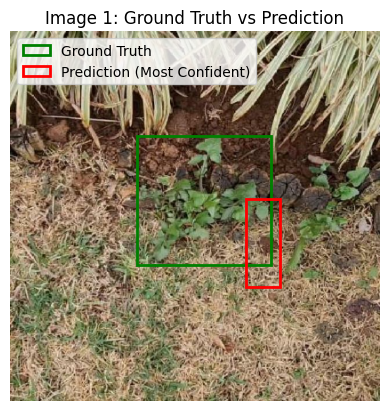

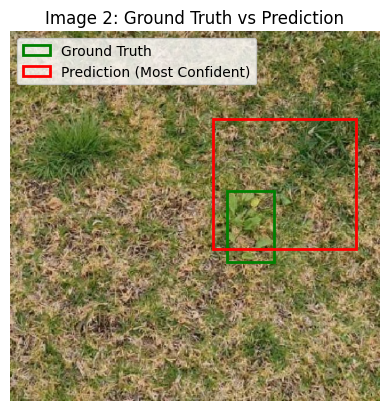

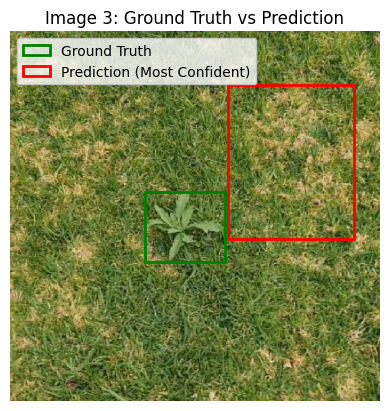

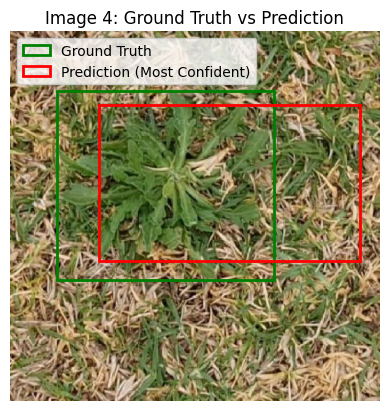

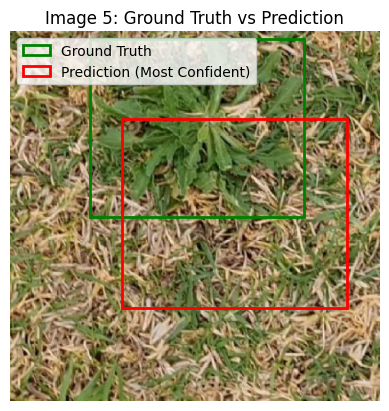

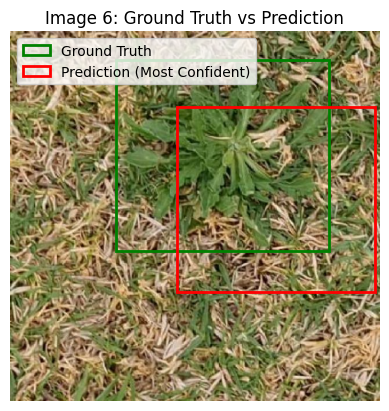

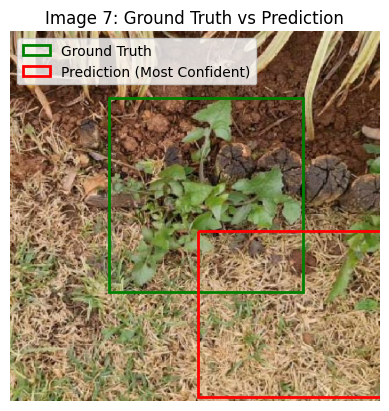

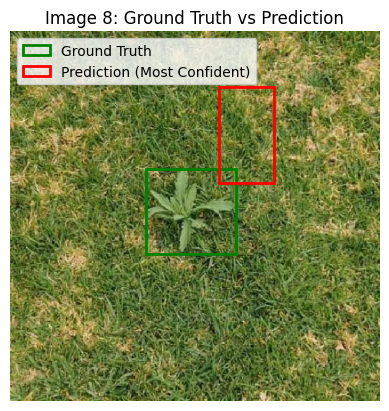

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


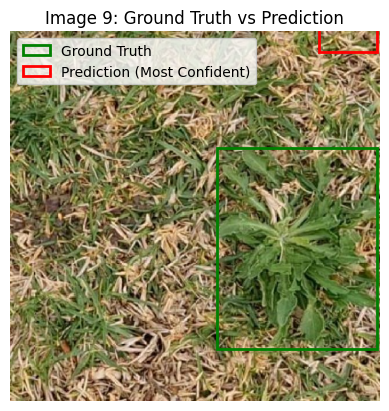

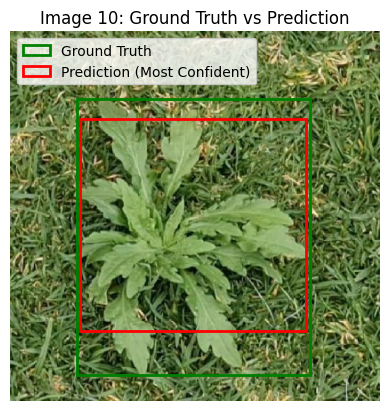

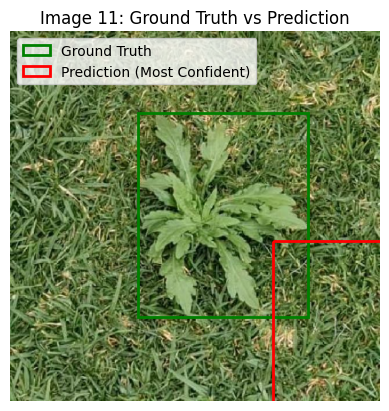

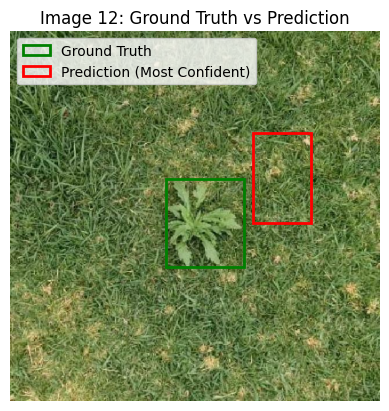

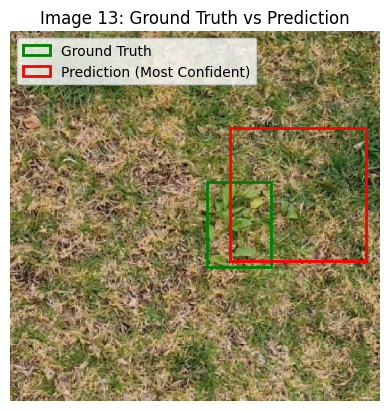

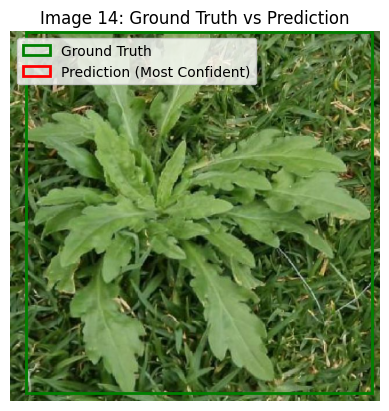

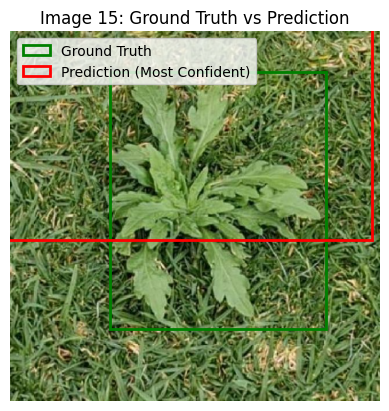

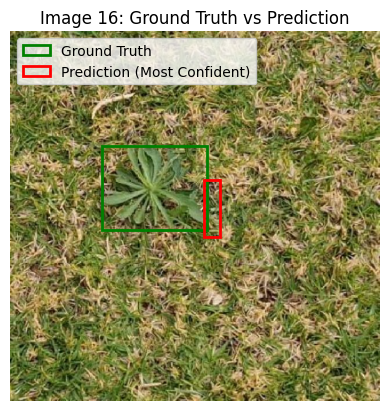

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


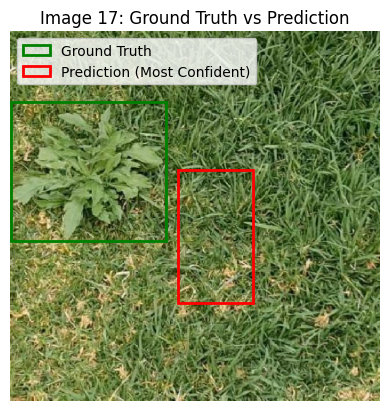

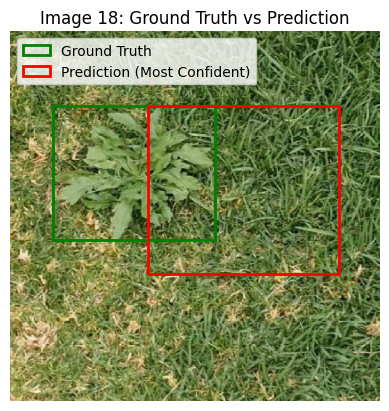

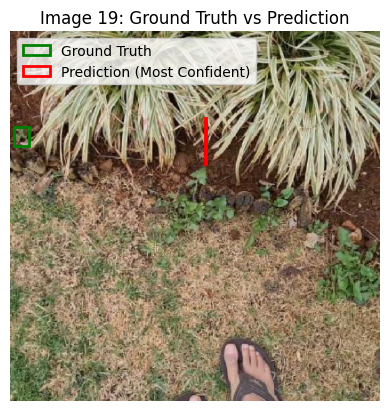

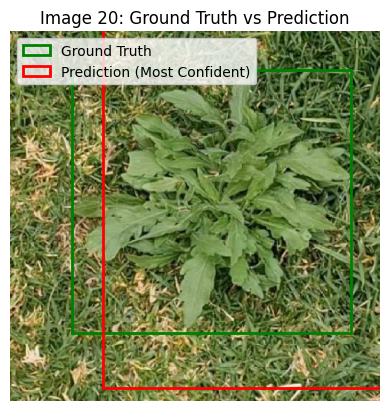

In [8]:
# Visualize predictions on the test dataset
print("Visualizing predictions...")
visualize_predictions(test_dataset, yolo_model, num_images=20)
